In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
print(os.getcwd())


c:\Users\aleja\OneDrive\Escritorio\Dev-DS\retail-online-agrupación


In [4]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [13]:
des_col=len(df['Description'].unique())
longitud_total = len(df['Description'])

In [14]:
if des_col ==longitud_total:
    print('Todos son unicos')
else:
    print('No todos son unicos')

No todos son unicos


In [15]:
X = df[['Quantity', 'Price', 'Customer ID']]

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

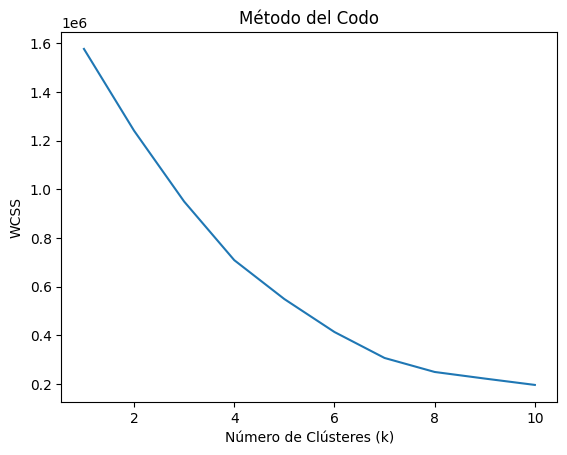

In [34]:
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('WCSS')
plt.show()

In [35]:
k = 3
kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [36]:
df['Cluster'] = kmeans.labels_

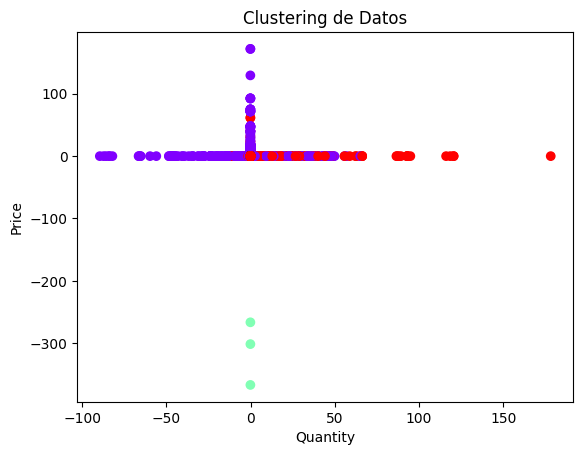

In [37]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Clustering de Datos')
plt.show()